In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
pd.options.display.max_rows = 7 #size of the outputs option

In [3]:
# Thanks to Shyong Lam and Jon Herlocker for cleaning up and generating the data set.
# data parser cell

# ratings.dat
'''All ratings are contained in the file "ratings.dat" and are in the
following format:

UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings'''
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat', sep='::', header=None, names=rnames)

# users.dat
'''User information is in the file "users.dat" and is in the following
format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is
not checked for accuracy.  Only users who have provided some demographic
information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"'''
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('datasets/movielens/users.dat', sep='::', header=None, names=unames)

# movies.dat
'''Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including
year of release)
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

- Some MovieIDs do not correspond to a movie due to accidental duplicate
entries and/or test entries
- Movies are mostly entered by hand, so errors and inconsistencies may exist'''
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::', header=None, names=mnames)


C:\Users\g.ermolaev\AppData\Local\Temp\ipykernel_10932\2740902718.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_table('datasets/movielens/ratings.dat', sep='::', header=None, names=rnames)
C:\Users\g.ermolaev\AppData\Local\Temp\ipykernel_10932\2740902718.py:63: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_table('datasets/movielens/users.dat', sep='::', header=None, names=unames)
C:\Users\g.ermolaev\AppData\Local\Temp\ipykernel_10932\2740902718.py:98: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (sepa

In [4]:
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
...,...,...,...
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [5]:
users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
...,...,...,...,...,...
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


In [6]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
...,...,...,...,...
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


In [7]:
# global merge
data = pd.merge(pd.merge(ratings, users), movies)

In [8]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western
1000208,5938,2909,4,957273353,M,25,1,35401,"Five Wives, Three Secretaries and Me (1998)",Documentary


In [9]:
# using pivot
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
...,...,...
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000
Zeus and Roxanne (1997),2.777778,2.357143
eXistenZ (1999),3.098592,3.289086


In [10]:
# same realization by groupby {wo reset_index()}
group = data.rating.groupby([data['title'], data['gender']]).agg('mean').reset_index() # probably the data.col_name is better but had to check this out
plot_sample = group[:30]
group

,title,gender,rating
0,"$1,000,000 Duck (1971)",F,3.375000
1,"$1,000,000 Duck (1971)",M,2.761905
2,'Night Mother (1986),F,3.388889
...,...,...,...
7149,Zeus and Roxanne (1997),M,2.357143
7150,eXistenZ (1999),F,3.098592
7151,eXistenZ (1999),M,3.289086


<AxesSubplot: xlabel='rating', ylabel='title'>

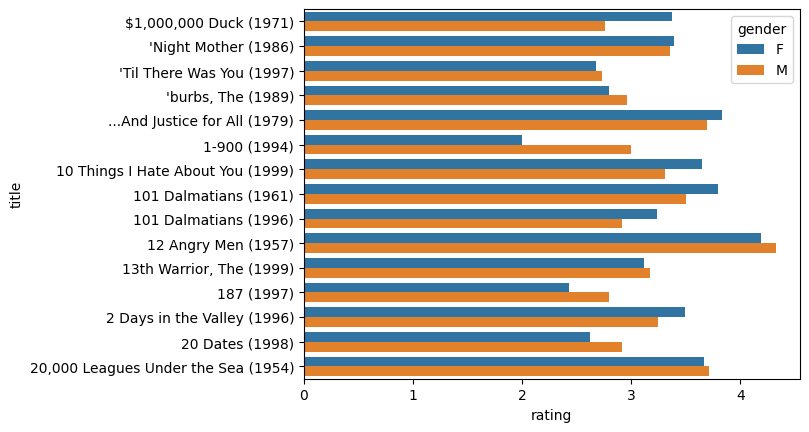

In [11]:
sns.barplot(data=plot_sample, x='rating', y='title', hue='gender')
# not dependet how much people take part in voting

In [12]:
ratings_by_title = data.groupby('title').size()
active_titles = ratings_by_title.index[ratings_by_title >= 250] # many reviews filmes

In [13]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
...,...,...
Young Sherlock Holmes (1985),3.514706,3.363344
Zero Effect (1998),3.864407,3.723140
eXistenZ (1999),3.098592,3.289086


In [14]:
famile_favorite = mean_ratings.groupby(mean_ratings.values[:,1])

In [18]:
top_female_ratings = mean_ratings.sort_index(level='M', ascending=True)
top_female_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
...,...,...
Young Sherlock Holmes (1985),3.514706,3.363344
Zero Effect (1998),3.864407,3.723140
eXistenZ (1999),3.098592,3.289086


In [20]:
for name, group in famile_favorite:
    print(name,group)

1.616949152542373 gender                           F         M
title                                       
Battlefield Earth (2000)  1.574468  1.616949
1.7925531914893618 gender                  F         M
title                              
Grease 2 (1982)  2.243478  1.792553
1.8203389830508474 gender                           F         M
title                                       
Super Mario Bros. (1993)  2.163636  1.820339
1.847457627118644 gender                                          F         M
title                                                      
Superman IV: The Quest for Peace (1987)  2.216216  1.847458
1.8630136986301369 gender                                 F         M
title                                             
Speed 2: Cruise Control (1997)  1.906667  1.863014
2.017467248908297 gender                       F         M
title                                   
Avengers, The (1998)  1.915254  2.017467
2.1003861003861 gender                   F         M
ti

3.0925925925925926 gender                         F         M
title                                     
Corrina, Corrina (1994)  3.52349  3.092593
3.0950226244343892 gender                F         M
title                            
U Turn (1997)  2.931034  3.095023
3.0968468468468466 gender                             F         M
title                                         
Me, Myself and Irene (2000)  2.62931  3.096847
3.098566308243728 gender                         F         M
title                                     
Double Jeopardy (1999)  3.451754  3.098566
3.100790513833992 gender                                 F         M
title                                             
General's Daughter, The (1999)  3.254054  3.100791
3.1054313099041533 gender                       F         M
title                                   
Summer of Sam (1999)  2.939024  3.105431
3.106382978723404 gender                       F         M
title                                   
Three Amigo

3.3992537313432836 gender                           F         M
title                                       
Girl, Interrupted (1999)  3.607362  3.399254
3.402321083172147 gender                                                     F         M
title                                                                 
Adventures of Buckaroo Bonzai Across the 8th Di...  3.308511  3.402321
3.4036281179138324 gender                                 F         M
title                                             
Flight of the Navigator (1986)  3.757895  3.403628
3.4048140043763677 gender                               F         M
title                                           
Whole Nine Yards, The (2000)  3.296552  3.404814
3.4050179211469533 gender                          F         M
title                                      
Frighteners, The (1996)  3.084746  3.405018
3.4107142857142856 gender                       F         M
title                                   
Big Kahuna, The (2000)  3

3.752442996742671 gender                                         F         M
title                                                     
Return of the Pink Panther, The (1974)  3.884615  3.752443
3.7545454545454544 gender                      F         M
title                                  
American Pie (1999)  3.539792  3.754545
3.7564935064935066 gender                 F         M
title                             
Aladdin (1992)  3.857143  3.756494
3.7593123209169055 gender                         F         M
title                                     
Charlotte's Web (1973)  3.972973  3.759312
3.759423503325942 gender                       F         M
title                                   
Jerry Maguire (1996)  3.758315  3.759424
3.7596153846153846 gender              F         M
title                          
Halloween (1978)  3.5  3.759615
3.760534429599178 gender                            F         M
title                                        
Planet of the Apes (1968)  3

3.9683698296836982 gender                        F        M
title                                   
Twelve Monkeys (1995)  3.845324  3.96837
3.968609865470852 gender                          F        M
title                                     
Glengarry Glen Ross (1992)  3.584  3.96861
3.969574036511156 gender                                           F         M
title                                                       
Lock, Stock & Two Smoking Barrels (1998)  3.628788  3.969574
3.969736842105263 gender                    F         M
title                                
Caddyshack (1980)  3.396135  3.969737
3.9722222222222223 gender                            F         M
title                                        
As Good As It Gets (1997)  3.902655  3.972222
3.9756335282651074 gender                                      F         M
title                                                  
There's Something About Mary (1998)  3.692754  3.975634
3.975970425138632 gender          

4.407894736842105 gender                      F         M
title                                  
Citizen Kane (1941)  4.332143  4.407895
4.408940397350993 gender                           F        M
title                                      
Great Escape, The (1963)  4.163043  4.40894
4.410891089108911 gender                             F         M
title                                         
Maltese Falcon, The (1941)  4.344681  4.410891
4.418423106947697 gender                                         F         M
title                                                     
One Flew Over the Cuckoo's Nest (1975)  4.310811  4.418423
4.437777777777778 gender                                 F         M
title                                             
Godfather: Part II, The (1974)  4.040936  4.437778
4.439821693907875 gender                            F         M
title                                        
Lawrence of Arabia (1962)  4.240506  4.439822
4.448275862068965 gender       

In [25]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
mean_ratings

gender,F,M,diff
title,,,
"'burbs, The (1989)",2.793478,2.962085,0.168607
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444
...,...,...,...
Young Sherlock Holmes (1985),3.514706,3.363344,-0.151362
Zero Effect (1998),3.864407,3.723140,-0.141266
eXistenZ (1999),3.098592,3.289086,0.190494


In [27]:
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
...,...,...,...
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351


In [34]:
# Стандартное отклонение оценок, сгруппированных по названию
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.sort_values(ascending=False).head()

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Name: rating, dtype: float64

In [ ]:
# добавить сортировку по жанрам
